<a href="https://colab.research.google.com/github/srewashimondal/NLP-Book-Recommendation/blob/main/book_rec_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srewashimondal01","key":"98568169e4d468296deedc1d64ec7741"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d dk123891/books-dataset-goodreadsmay-2024

Dataset URL: https://www.kaggle.com/datasets/dk123891/books-dataset-goodreadsmay-2024
License(s): MIT
  0% 0.00/68.9M [00:00<?, ?B/s]
100% 68.9M/68.9M [00:00<00:00, 2.08GB/s]


In [4]:
#Unzip the dataset
!unzip books-dataset-goodreadsmay-2024.zip

Archive:  books-dataset-goodreadsmay-2024.zip
  inflating: Book_Details.csv        
  inflating: book_reviews.db         
  inflating: books.db                


In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Book_Details.csv")

# Preview the data
df.head(10)

,Unnamed: 0,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
0,0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
1,1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."
2,2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856..."
3,3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7..."
4,4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7..."
5,5,8,https://images-na.ssl-images-amazon.com/images...,"Harry Potter Boxed Set, Books 1-5",Box Set containing Harry Potter and the Sorcer...,"['2690 pages, Paperback']","['First published October 1, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['2690'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",148443,313,4.72,"{'5': '120,035', '4': '19,721', '3': '5,489', ..."
6,6,10,https://images-na.ssl-images-amazon.com/images...,Harry Potter Collection,"Six years of magic, adventure, and mystery mak...","['3342 pages, Hardcover']","['First published January 1, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['3342'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",32990,974,4.72,"{'5': '26,491', '4': '4,731', '3': '1,183', '2..."
7,7,11,https://images-na.ssl-images-amazon.com/images...,The Hitchhiker’s Guide to the Galaxy,Seconds before the Earth is demolished to make...,"['216 pages, Mass Market Paperback']","['First published October 12, 1979']",https://www.goodreads.com/author/show/4.Dougla...,Douglas Adams,['216'],"['Science Fiction', 'Fiction', 'Humor', 'Fanta...",1849362,46122,4.23,"{'5': '936,656', '4': '544,512', '3': '256,245..."
8,8,13,https://images-na.ssl-images-amazon.com/images...,The Ultimate Hitchhiker’s Guide to the Galaxy,"At last in paperback in one complete volume, h...","['815 pages, Paperback']","['First published January 17, 1996']",https://www.goodreads.com/author/show/4.Dougla...,Douglas Adams,['815'],"['Science Fiction', 'Fiction', 'Humor', 'Fanta...",323845,6355,4.38,"{'5': '187,914', '4': '88,512', '3': '34,756',..."
9,9,21,https://images-na.ssl-images-amazon.com/images...,A Short History of Nearly Everything,Bill Bryson describes himself as a reluctant t...,"['544 pages, Paperback']","['

In [6]:
df = df[['book_title', 'book_details', 'publication_info', 'author', 'num_pages', 'genres', 'num_ratings', 'num_reviews', 'average_rating']]

In [7]:
#Step 1: Clean num_pages, num_ratings, num_reviews

# Extract digits from num_pages (to handle entries like '345 pages' or 'unknown')
df['num_pages'] = df['num_pages'].astype(str).str.extract('(\d+)')
df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')

# Convert the other numeric features
df['num_ratings'] = pd.to_numeric(df['num_ratings'], errors='coerce')
df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

/tmp/ipython-input-7-2380177079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_pages'] = df['num_pages'].astype(str).str.extract('(\d+)')
/tmp/ipython-input-7-2380177079.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')
/tmp/ipython-input-7-2380177079.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [8]:
# Drop rows with missing values in features or target
df_clean = df.dropna(subset=['num_ratings', 'num_reviews', 'num_pages', 'average_rating']).copy()

In [9]:
X = df_clean[['num_ratings', 'num_reviews', 'num_pages']]
y = df_clean['average_rating']

In [10]:
# Test-train split + scale

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Just check

print("df_clean shape:", df_clean.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

df_clean shape: (15946, 9)
X_train shape: (12756, 3)
X_test shape: (3190, 3)


Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred_lr = lr.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("📉 Linear Regression Results")
print("Mean Squared Error:", mse_lr)
print("R² Score:", r2_lr)

📉 Linear Regression Results
Mean Squared Error: 0.09809176390443664
R² Score: 0.048579335902341314


In [16]:
# Cross Validation
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores_lr = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_lr = np.sqrt(-cv_scores_lr)

print("Cross-validated RMSE scores (Linear Regression):", cv_rmse_lr)
print("Average CV RMSE:", cv_rmse_lr.mean())


Cross-validated RMSE scores (Linear Regression): [0.25409649 0.26366416 0.33205122 0.38179981 0.37097496]
Average CV RMSE: 0.32051732833186186


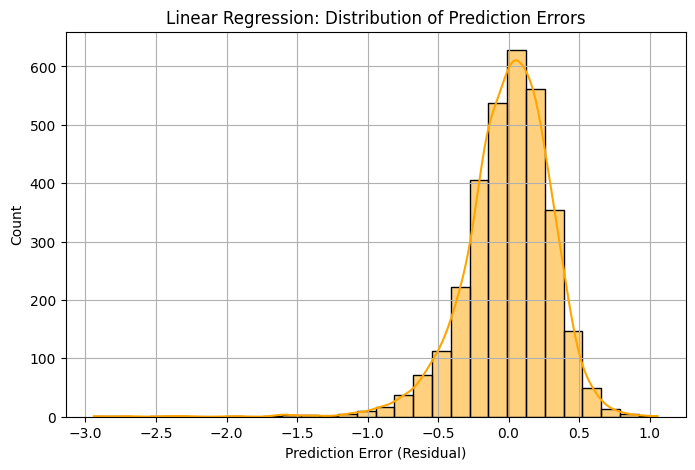

In [17]:
# Histogram
import matplotlib.pyplot as plt
import seaborn as sns

errors_lr = y_test - y_pred_lr

plt.figure(figsize=(8, 5))
sns.histplot(errors_lr, bins=30, kde=True, color='orange')
plt.title("Linear Regression: Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Count")
plt.grid(True)
plt.show()
